In [198]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score, roc_curve

In [115]:
# Load the data
data_path = 'sph6004_assignment1_data.csv'
data = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,id,aki,gender,admission_age,race,heart_rate_min,heart_rate_max,heart_rate_mean,sbp_min,sbp_max,...,ggt_max,ld_ldh_min,ld_ldh_max,gcs_min,gcs_motor,gcs_verbal,gcs_eyes,gcs_unable,height,weight_admit
0,36570066,3,F,79.953141,BLACK/AFRICAN AMERICAN,96.0,104.0,100.083333,103.0,126.0,...,NaN,236.0,318.0,15.0,6.0,5.0,4.0,0.0,157.0,110.0
1,39307659,0,F,78.194169,WHITE - RUSSIAN,72.0,134.0,97.263158,97.0,127.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,82.0
2,38743306,2,F,65.602396,WHITE,60.0,97.0,84.166667,95.0,143.0,...,NaN,NaN,NaN,15.0,6.0,5.0,4.0,0.0,NaN,62.1
3,32339865,2,F,64.906629,UNKNOWN,59.0,87.0,71.461538,113.0,150.0,...,NaN,NaN,NaN,15.0,1.0,0.0,1.0,1.0,170.0,113.1
4,35526987,2,M,57.438861,WHITE,57.0,100.0,82.387097,81.0,127.0,...,NaN,NaN,NaN,15.0,NaN,0.0,1.0,1.0,178.0,97.4


In [116]:
data.shape

(50920, 162)

In [141]:
# Check for missing values
missing_values = data.isnull().mean() * 100

# Categorical columns for encoding
categorical_cols = data.select_dtypes(include=['object']).columns

# Summary of missing values and categorical columns
missing_values_summary = missing_values[missing_values > 0].sort_values(ascending=False)


missing_values_summary

thrombin_max       99.821288
thrombin_min       99.821288
d_dimer_min        99.785939
d_dimer_max        99.785939
ggt_max            99.073056
                     ...    
dbp_min             0.190495
dbp_mean            0.190495
heart_rate_mean     0.155145
heart_rate_max      0.155145
heart_rate_min      0.155145
Length: 157, dtype: float64

In [142]:
columns_to_keep = missing_values[missing_values <= 30].index

In [143]:
len(columns_to_keep)

65

In [144]:
columns_to_keep = missing_values[missing_values <= 30].index
data_filtered_less_missing_cols = data[columns_to_keep]
# Determine if there are rows with a high percentage of missing values in the filtered dataset
missing_values_by_row_filtered = data_filtered_less_missing_cols.isnull().sum(axis=1)

# Calculate the percentage of missing values for each row in the filtered dataset
percentage_missing_by_row_filtered = (missing_values_by_row_filtered / data_filtered_less_missing_cols.shape[1]) * 100

# Check the number of rows with more than 50% missing values in the filtered dataset
rows_with_high_missing_values_filtered = percentage_missing_by_row_filtered[percentage_missing_by_row_filtered > 50].count()

rows_with_high_missing_values_filtered


157

In [145]:
# Remove rows with more than 50% missing values in the filtered dataset
data_cleaned = data_filtered_less_missing_cols[percentage_missing_by_row_filtered <= 50]

# Check the shape of the dataset after removing rows with high missing values
data_cleaned_shape = data_cleaned.shape

# Verify the cleanup by checking if there are still rows with high missing values
missing_values_by_row_cleaned = data_cleaned.isnull().sum(axis=1)
percentage_missing_by_row_cleaned = (missing_values_by_row_cleaned / data_cleaned.shape[1]) * 100

data_cleaned_shape


(50763, 65)

In [146]:
# Check for missing values
missing_values_cleaned = data_cleaned.isnull().mean() * 100

# Summary of missing values and categorical columns
missing_values_cleaned_summary = missing_values_cleaned[missing_values_cleaned > 0].sort_values(ascending=False)


missing_values_cleaned_summary

ptt_max              10.222012
ptt_min              10.222012
inr_max               9.686189
inr_min               9.686189
pt_max                9.684219
pt_min                9.684219
calcium_min.1         9.331600
calcium_max.1         9.331600
temperature_max       3.185391
temperature_min       3.185391
temperature_mean      3.185391
glucose_mean          2.013277
glucose_max           2.013277
glucose_min           2.013277
weight_admit          1.991608
glucose_min.2         1.246971
glucose_max.2         1.246971
gcs_motor             1.245001
aniongap_min          0.998759
aniongap_max          0.998759
gcs_verbal            0.973150
potassium_min.1       0.935721
potassium_max.1       0.935721
bicarbonate_max.1     0.898292
bicarbonate_min.1     0.898292
sodium_max.1          0.880563
sodium_min.1          0.880563
chloride_max.1        0.874653
chloride_min.1        0.874653
gcs_eyes              0.705238
hemoglobin_min.1      0.644170
hemoglobin_max.1      0.644170
wbc_min 

In [147]:
data_cleaned = data_cleaned.fillna(0)

In [43]:
data_cleaned.to_csv('data_cleaned.csv')

In [148]:
# For simplicity, encode categorical variables manually (gender and race for now)
data_cleaned['gender'] = data_cleaned['gender'].map({'F': 0.0, 'M': 1.0})
data_cleaned = data_cleaned.drop(columns=['race', 'id'])
# Define the target variable (y) and the features (X)
X = data_cleaned.drop('aki', axis=1)
y = data_cleaned['aki']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [149]:

# Compute the correlation of each feature with the target variable
correlations = X.corrwith(y)

# Convert to a DataFrame, take the absolute values, and sort by correlation strength
correlations_df = correlations.abs().sort_values(ascending=False).reset_index()
correlations_df.columns = ['Feature', 'Absolute Correlation']

# Display the ranked features based on their absolute correlation with 'aki'
correlations_df


,Feature,Absolute Correlation
0,bun_max,0.242342
1,bun_min,0.234780
2,gcs_verbal,0.195807
3,dbp_min,0.181049
4,sbp_min,0.178101
...,...,...
57,glucose_mean,0.007170
58,chloride_min.1,0.006101
59,dbp_max,0.004455
60,glucose_min,0.001412


In [150]:
candidate_features = correlations_df[correlations_df['Absolute Correlation']>0.15]['Feature']
X_selected = data_cleaned[candidate_features]

In [151]:
candidate_features

0             bun_max
1             bun_min
2          gcs_verbal
3             dbp_min
4             sbp_min
5             mbp_min
6       admission_age
7     potassium_max.1
8        aniongap_max
9             ptt_max
10         gcs_unable
11             pt_max
12           gcs_eyes
13            inr_max
Name: Feature, dtype: object

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [201]:
# Implementing a basic version of Forward Selection
# Start with no variables and add them one by one
selected_features = []
current_score, best_new_score = 0.0, 0.0

while True:
    scores_with_candidates = []
    for feature in X_train.columns:
        if feature not in selected_features:
            X_train_selected = X_train[selected_features + [feature]]
            X_test_selected = X_test[selected_features + [feature]]
            rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
            rf_classifier.fit(X_train_selected, y_train)
            y_pred = rf_classifier.predict(X_test_selected)
            score = accuracy_score(y_test, y_pred)
            scores_with_candidates.append((score, feature))
            print(f'score:{score} candidate:{feature}')
    
    scores_with_candidates.sort(reverse=True)
    best_new_score, best_candidate = scores_with_candidates[0]
    
    if best_new_score > current_score:
        selected_features.append(best_candidate)
        current_score = best_new_score
    else:
        break  # Exit loop if no improvement

selected_features

score:0.40520043336944744 candidate:bun_max
score:0.40066975278242883 candidate:bun_min
score:0.3914114054959125 candidate:gcs_verbal
score:0.37594799566630555 candidate:dbp_min
score:0.3776223776223776 candidate:sbp_min
score:0.3725992317541613 candidate:mbp_min
score:0.28543287698217273 candidate:admission_age
score:0.3706293706293706 candidate:potassium_max.1
score:0.35437801634984734 candidate:aniongap_max
score:0.35152171771890084 candidate:ptt_max
score:0.3702353984044125 candidate:gcs_unable
score:0.3792967595784497 candidate:pt_max
score:0.37466758593519156 candidate:gcs_eyes
score:0.38422141239042645 candidate:inr_max
score:0.3935782527331823 candidate:bun_min
score:0.4076627597754358 candidate:gcs_verbal
score:0.3781148429035753 candidate:dbp_min
score:0.3697429331232148 candidate:sbp_min
score:0.37486457204767065 candidate:mbp_min
score:0.31123805771693097 candidate:admission_age
score:0.37555402344134736 candidate:potassium_max.1
score:0.38589579434649857 candidate:aniongap

['bun_max', 'gcs_unable']

In [202]:
X_selected_final = data_cleaned[['bun_max', 'gcs_unable']]
y_binarized = label_binarize(y, classes=[0, 1, 2, 3])
X_train, X_test, y_train, y_test, y_train_binarized, y_test_binarized = train_test_split(X_selected_final, y, y_binarized, test_size=0.2, random_state=42)

# random forest

In [203]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = rf_classifier.predict(X_test)
y_score = rf_classifier.predict_proba(X_test)
auroc = roc_auc_score(y_test_binarized, y_score, multi_class='ovr', average='macro')
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"Multi-class AUROC: {auroc}")
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.61      0.52      3319
           1       0.16      0.00      0.01      1989
           2       0.38      0.51      0.44      3309
           3       0.37      0.30      0.33      1536

    accuracy                           0.41     10153
   macro avg       0.34      0.36      0.32     10153
weighted avg       0.36      0.41      0.36     10153

Multi-class AUROC: 0.6249857685662767
Accuracy: 0.41101152368758004


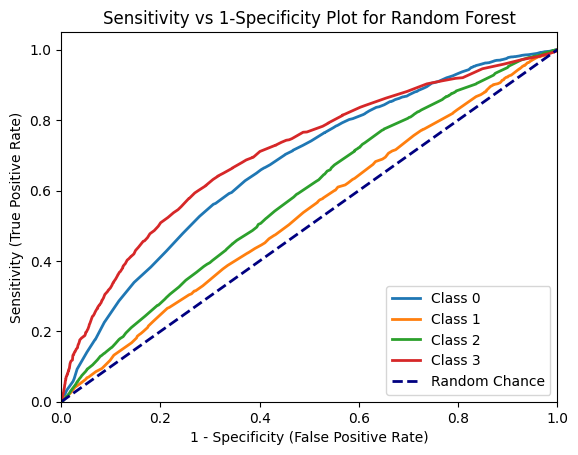

In [204]:
# Assuming y_test_binarized and y_score from the previous example are available

# Compute ROC curve and ROC area for each class
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    # Sensitivity is tpr, specificity is 1-fpr
    # Plotting sensitivity vs (1-specificity) is equivalent to plotting TPR vs FPR
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Sensitivity vs 1-Specificity Plot for Random Forest')
plt.legend(loc="lower right")
plt.show()


# SVM

In [208]:
# Initializing the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True, random_state=42)

# Fitting the SVM classifier to the Training set
svm_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_svm = svm_classifier.predict(X_test)


In [211]:
y_score_svm = svm_classifier.predict_proba(X_test)
y_score_svm = svm_classifier.predict_proba(X_test)
auroc_svm = roc_auc_score(y_test_binarized, y_score_svm, multi_class='ovr', average='macro')
# Evaluating the SVM classifier
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print(f"Multi-class AUROC: {auroc_svm}")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.86      0.52      3319
           1       0.00      0.00      0.00      1989
           2       0.40      0.25      0.31      3309
           3       0.41      0.14      0.21      1536

    accuracy                           0.38     10153
   macro avg       0.30      0.31      0.26     10153
weighted avg       0.32      0.38      0.30     10153

Multi-class AUROC: 0.6163997883845328
Accuracy: 0.38303949571555207


/Users/qianyi/anaconda3/envs/hmarl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/qianyi/anaconda3/envs/hmarl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/qianyi/anaconda3/envs/hmarl/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz

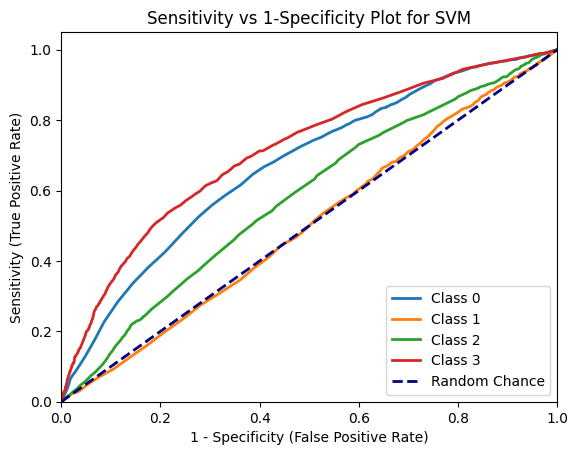

In [212]:
# Assuming y_test_binarized and y_score from the previous example are available

# Compute ROC curve and ROC area for each class
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_svm[:, i])
    # Sensitivity is tpr, specificity is 1-fpr
    # Plotting sensitivity vs (1-specificity) is equivalent to plotting TPR vs FPR
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Sensitivity vs 1-Specificity Plot for SVM')
plt.legend(loc="lower right")
plt.show()

# AdaBoost

In [213]:
# Initializing the AdaBoost classifier with a Decision Tree base estimator
ada_classifier = AdaBoostClassifier(
    n_estimators=100,
    random_state=42
)

# Fitting the AdaBoost classifier to the Training set
ada_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_ada = ada_classifier.predict(X_test)

# Evaluating the AdaBoost classifier
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


/Users/qianyi/anaconda3/envs/hmarl/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost Accuracy: 0.41642864178075445


In [214]:
y_score_ada = ada_classifier.predict_proba(X_test)
auroc_ada = roc_auc_score(y_test_binarized, y_score_ada, multi_class='ovr', average='macro')
# Evaluating the SVM classifier
print("Classification Report:\n", classification_report(y_test, y_pred_ada))
print(f"AdaBoost AUROC: {auroc_ada}")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52      3319
           1       0.17      0.00      0.00      1989
           2       0.39      0.54      0.45      3309
           3       0.37      0.30      0.33      1536

    accuracy                           0.42     10153
   macro avg       0.35      0.36      0.33     10153
weighted avg       0.37      0.42      0.37     10153

AdaBoost AUROC: 0.6193689492081415
Accuracy: 0.41642864178075445


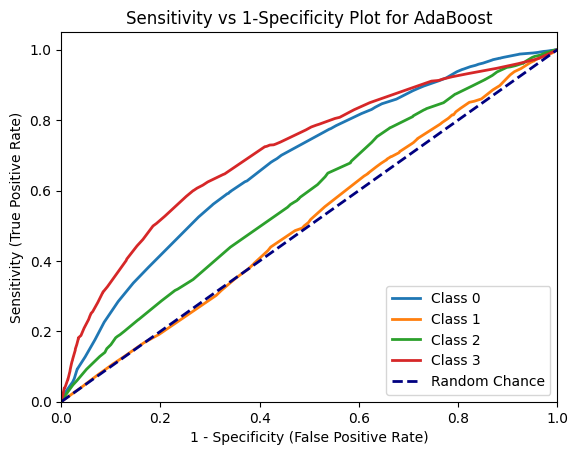

In [219]:
# Assuming y_test_binarized and y_score from the previous example are available

# Compute ROC curve and ROC area for each class
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_ada[:, i])
    # Sensitivity is tpr, specificity is 1-fpr
    # Plotting sensitivity vs (1-specificity) is equivalent to plotting TPR vs FPR
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Sensitivity vs 1-Specificity Plot for AdaBoost')
plt.legend(loc="lower right")
plt.show()

# Gradient Boost

In [159]:
# Initializing the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fitting the Gradient Boosting classifier to the Training set
gb_classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred_gb = gb_classifier.predict(X_test)

# Evaluating the Gradient Boosting classifier
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.41770905151186843


In [221]:
y_score_gb = gb_classifier.predict_proba(X_test)
auroc_gb = roc_auc_score(y_test_binarized, y_score_gb, multi_class='ovr', average='macro')
# Evaluating the SVM classifier
print("Classification Report:\n", classification_report(y_test, y_pred_gb))
print(f"Multi-class AUROC: {auroc_gb}")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.60      0.52      3319
           1       0.00      0.00      0.00      1989
           2       0.39      0.54      0.45      3309
           3       0.39      0.32      0.35      1536

    accuracy                           0.42     10153
   macro avg       0.31      0.36      0.33     10153
weighted avg       0.33      0.42      0.37     10153

Multi-class AUROC: 0.6284374191671978
Accuracy: 0.41770905151186843


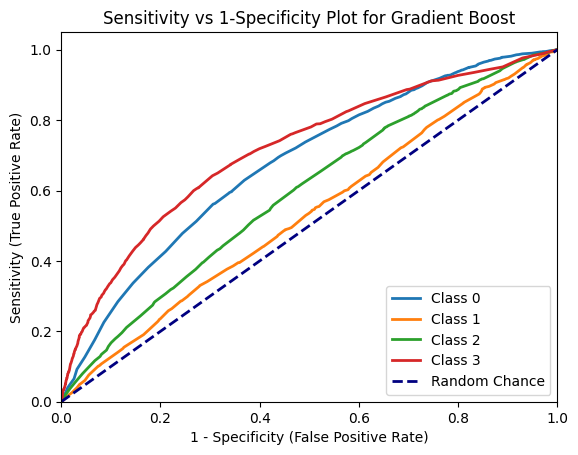

In [222]:
# Assuming y_test_binarized and y_score from the previous example are available

# Compute ROC curve and ROC area for each class
n_classes = 4
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score_gb[:, i])
    # Sensitivity is tpr, specificity is 1-fpr
    # Plotting sensitivity vs (1-specificity) is equivalent to plotting TPR vs FPR
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Chance')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Sensitivity vs 1-Specificity Plot for Gradient Boost')
plt.legend(loc="lower right")
plt.show()